=== APLIKASI PREDIKSI HARGA SAHAM (CRISP-DM STANDAR) ===
Tujuan: Memprediksi harga penutupan (Close Price) saham masa depan.

--- [1] PENGUMPULAN DATA ---
1. Yahoo Finance
2. Upload CSV
Pilih sumber data (1/2): 1
Masukkan ticker (contoh: BBCA.JK, NVDA): nvda
Tanggal mulai (YYYY-MM-DD): 2018-01-01
Tanggal akhir (YYYY-MM-DD, kosong = hari ini): 


/tmp/ipython-input-4167769445.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Mengambil data nvda...

Data mentah dimuat: 2017 baris.


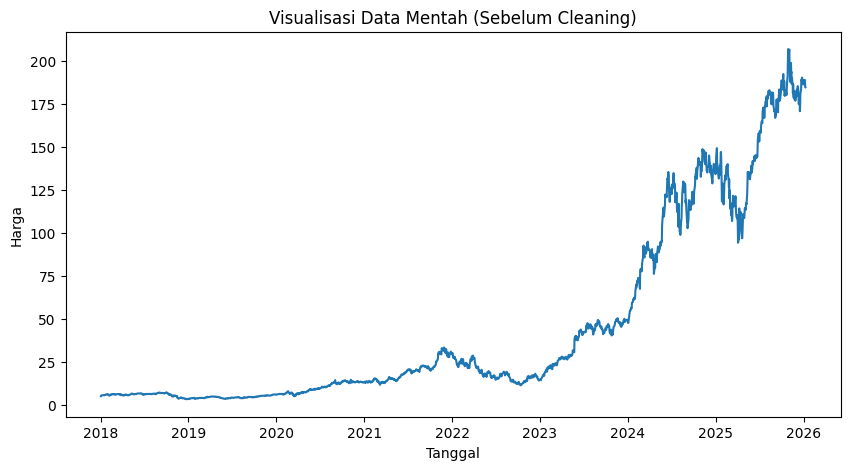


--- [2] DATA PREPARATION & CLEANING ---

>> LAPORAN: BEFORE CLEANING (Data Mentah)
----------------------------------------
Total Baris Data        : 2017
Jumlah Missing Values   : 0
Jumlah Duplikat Waktu   : 0
----------------------------------------
Sampel Data Mentah (5 Teratas):
Price       Date     Close
0     2018-01-02  4.928533
1     2018-01-03  5.252898
2     2018-01-04  5.280588
3     2018-01-05  5.325337
4     2018-01-08  5.488510

>> MELAKUKAN PEMBERSIHAN DATA...

>> LAPORAN: AFTER CLEANING (Data Bersih)
----------------------------------------
Total Baris Data        : 2017
Jumlah Missing Values   : 0
Jumlah Duplikat Waktu   : 0
----------------------------------------
Sampel Data Bersih (5 Teratas):
Price       Date     Close
0     2018-01-02  4.928533
1     2018-01-03  5.252898
2     2018-01-04  5.280588
3     2018-01-05  5.325337
4     2018-01-08  5.488510

>> KONFIGURASI PARAMETER MODEL
Window hari (lookback, rek: 60): 60
Prediksi hari ke depan (rek: 30): 10
Jumlah ep

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0054
Epoch 2/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 3.5052e-04
Epoch 3/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.3769e-04
Epoch 4/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.0983e-04
Epoch 5/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 2.5451e-04
Epoch 6/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 1.8842e-04
Epoch 7/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 1.8659e-04
Epoch 8/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.9590e-04
Epoch 9/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 1.7411e-04
Epoch 10/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.8771e-04
Epoch 11/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.0225e-04
Epoch 12/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 1.9292e-04
Epoch 13/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 2.2557e-04
Epoch 14/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.1167e-04
Epoch 15/60
49/49 ━━━━━━━━━━━━

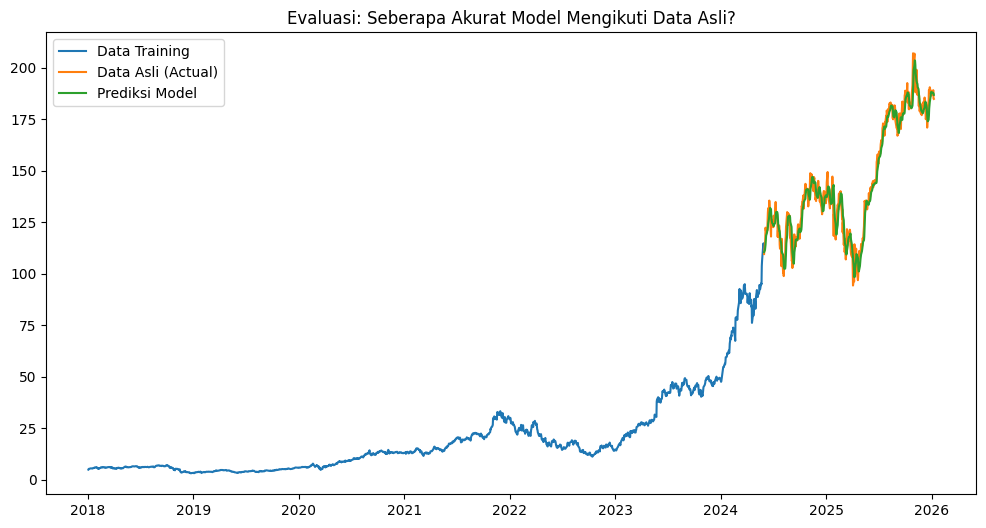


--- [5] DEPLOYMENT & FORECASTING ---
Memprediksi harga untuk 10 hari ke depan...

=== TABEL PREDIKSI ===
        Date  Predicted Price
0 2026-01-10       185.931325
1 2026-01-11       185.361879
2 2026-01-12       184.916578
3 2026-01-13       184.525913
4 2026-01-14       184.160792


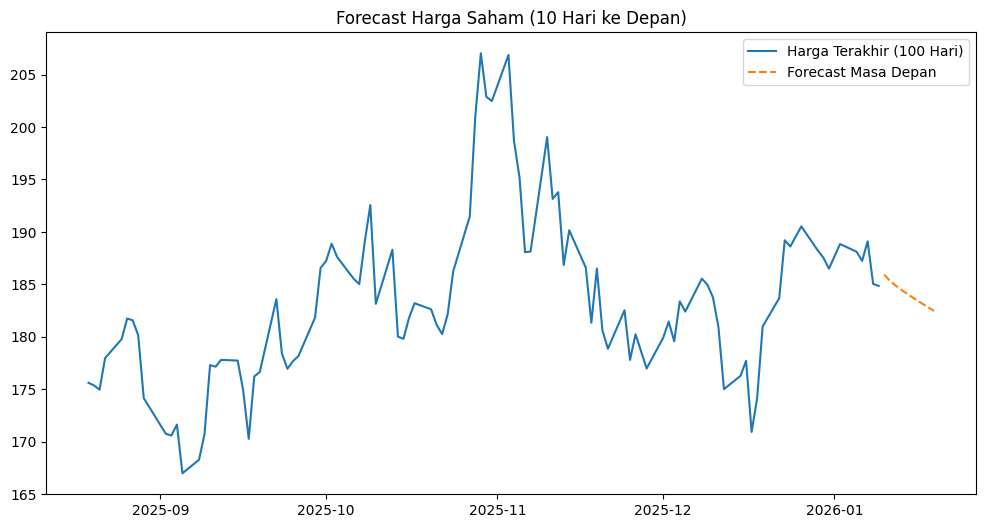


Sedang menyimpan aset deployment...
✅ Scaler tersimpan: stock_scaler_crispdm.pkl
✅ Model tersimpan: stock_model_crispdm.h5
Selesai.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from datetime import datetime, date

# ==============================================================================
# FASE 1: BUSINESS UNDERSTANDING (MENENTUKAN TUJUAN)
# ==============================================================================
print("=== APLIKASI PREDIKSI HARGA SAHAM (CRISP-DM STANDAR) ===")
print("Tujuan: Memprediksi harga penutupan (Close Price) saham masa depan.")

# ==============================================================================
# FASE 2: DATA UNDERSTANDING (PENGUMPULAN DATA)
# ==============================================================================
print("\n--- [1] PENGUMPULAN DATA ---")
print("1. Yahoo Finance")
print("2. Upload CSV")
choice = input("Pilih sumber data (1/2): ")

df = None

if choice == "1":
    ticker = input("Masukkan ticker (contoh: BBCA.JK, NVDA): ")
    start_date = input("Tanggal mulai (YYYY-MM-DD): ")
    end_date = input("Tanggal akhir (YYYY-MM-DD, kosong = hari ini): ")
    if end_date.strip() == "":
        end_date = date.today().strftime("%Y-%m-%d")

    print(f"Mengambil data {ticker}...")
    data = yf.download(ticker, start=start_date, end=end_date)

    # Handling MultiIndex (Masalah umum yfinance versi baru)
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)

    data.reset_index(inplace=True)
    df = data[['Date', 'Close']].copy()

elif choice == "2":
    path = input("Masukkan path file CSV: ")
    df = pd.read_csv(path)
    df.columns = [c.capitalize() for c in df.columns]
    if 'Date' not in df.columns or 'Close' not in df.columns:
        raise ValueError("CSV harus memiliki kolom Date dan Close")
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)
else:
    raise ValueError("Pilihan tidak valid")

# Visualisasi Awal (Eksplorasi)
print(f"\nData mentah dimuat: {len(df)} baris.")
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'])
plt.title("Visualisasi Data Mentah (Sebelum Cleaning)")
plt.xlabel("Tanggal")
plt.ylabel("Harga")
plt.show()

# ==============================================================================
# FASE 3: DATA PREPARATION (PEMBERSIHAN DATA SECARA DETAIL)
# ==============================================================================
print("\n--- [2] DATA PREPARATION & CLEANING ---")

# --- LANGKAH 3.A: INSPEKSI BEFORE CLEANING ---
print("\n>> LAPORAN: BEFORE CLEANING (Data Mentah)")
print("-" * 40)
print(f"Total Baris Data        : {len(df)}")
print(f"Jumlah Missing Values   : {df['Close'].isnull().sum()}")
print(f"Jumlah Duplikat Waktu   : {df['Date'].duplicated().sum()}")
print("-" * 40)
print("Sampel Data Mentah (5 Teratas):")
print(df.head())

# --- LANGKAH 3.B: PROSES CLEANING ---
print("\n>> MELAKUKAN PEMBERSIHAN DATA...")

# 1. Menangani Duplikat (Ambil yang terakhir jika ada tanggal ganda)
df = df.drop_duplicates(subset=['Date'], keep='last')

# 2. Menangani Missing Values (NaN)
# Strategi: Forward Fill (ffill).
# Alasan: Dalam saham, jika data hari ini hilang, diasumsikan harganya sama dengan kemarin.
# Tidak di-drop begitu saja agar rentang waktu tidak putus.
df['Close'] = df['Close'].ffill()

# 3. Drop sisa NaN jika ada di baris pertama (karena tidak ada data sebelumnya untuk ffill)
df = df.dropna()

# 4. Sorting ulang untuk memastikan urutan waktu
df = df.sort_values(by='Date').reset_index(drop=True)

# --- LANGKAH 3.C: INSPEKSI AFTER CLEANING ---
print("\n>> LAPORAN: AFTER CLEANING (Data Bersih)")
print("-" * 40)
print(f"Total Baris Data        : {len(df)}")
print(f"Jumlah Missing Values   : {df['Close'].isnull().sum()}")
print(f"Jumlah Duplikat Waktu   : {df['Date'].duplicated().sum()}")
print("-" * 40)
print("Sampel Data Bersih (5 Teratas):")
print(df.head())

# --- LANGKAH 3.D: SCALING (NORMALISASI) ---
# Membantu LSTM agar tidak bingung dengan angka ribuan/jutaan
data_close = df[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_close)

# --- LANGKAH 3.E: PEMBAGIAN DATA & PEMBENTUKAN STRUKTUR 3D ---
# Parameter User
print("\n>> KONFIGURASI PARAMETER MODEL")
prediction_days = int(input("Window hari (lookback, rek: 60): "))
future_days = int(input("Prediksi hari ke depan (rek: 30): "))
epochs = int(input("Jumlah epoch (rek: 10-50): "))
split_ratio = float(input("Rasio training (rek: 0.8): "))

training_data_len = int(len(scaled_data) * split_ratio)
train_data = scaled_data[:training_data_len]

# Membuat struktur data X (Fitur) dan Y (Target)
x_train, y_train = [], []
for i in range(prediction_days, len(train_data)):
    x_train.append(train_data[i-prediction_days:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape untuk input LSTM [Samples, Time Steps, Features]
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

# ==============================================================================
# FASE 4: MODELING (MEMBANGUN MODEL AI)
# ==============================================================================
print("\n--- [3] MODELING (LSTM ARCHITECTURE) ---")
model = Sequential()
# Layer 1
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
# Layer 2
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
# Output Layer
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

print("Mulai melatih model...")
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, verbose=1)

# ==============================================================================
# FASE 5: EVALUATION (PENGUJIAN PERFORMA)
# ==============================================================================
print("\n--- [4] EVALUATION ---")
# Menyiapkan data test
test_data = scaled_data[training_data_len - prediction_days:]
x_test = []
y_test = data_close[training_data_len:] # Data asli untuk pembanding

for i in range(prediction_days, len(test_data)):
    x_test.append(test_data[i-prediction_days:i, 0])

x_test = np.array(x_test)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Prediksi
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # Kembalikan ke harga asli

# Hitung Metrik Error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mape = mean_absolute_percentage_error(y_test, predictions) * 100

print("\n=== HASIL AKHIR EVALUASI ===")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error)  : {mape:.2f}%")

# Plot Hasil Validasi
valid = df.iloc[training_data_len:].copy()
valid['Predictions'] = predictions

plt.figure(figsize=(12,6))
plt.plot(df['Date'][:training_data_len], df['Close'][:training_data_len], label='Data Training')
plt.plot(valid['Date'], valid['Close'], label='Data Asli (Actual)')
plt.plot(valid['Date'], valid['Predictions'], label='Prediksi Model')
plt.legend()
plt.title("Evaluasi: Seberapa Akurat Model Mengikuti Data Asli?")
plt.show()

# ==============================================================================
# FASE 6: DEPLOYMENT (FORECASTING & SAVING)
# ==============================================================================
print("\n--- [5] DEPLOYMENT & FORECASTING ---")

# Forecast masa depan
last_days = scaled_data[-prediction_days:]
current_batch = last_days.reshape((1, prediction_days, 1))
future_preds = []

print(f"Memprediksi harga untuk {future_days} hari ke depan...")
for _ in range(future_days):
    pred = model.predict(current_batch, verbose=0)[0]
    future_preds.append(pred)
    current_batch = np.append(current_batch[:, 1:, :], [[pred]], axis=1)

future_preds = scaler.inverse_transform(future_preds)

# Buat DataFrame hasil prediksi
future_dates = pd.date_range(df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=future_days)
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Price': future_preds.flatten()
})

print("\n=== TABEL PREDIKSI ===")
print(forecast_df.head())

# Plot Akhir
plt.figure(figsize=(12,6))
plt.plot(df['Date'].tail(100), df['Close'].tail(100), label='Harga Terakhir (100 Hari)')
plt.plot(forecast_df['Date'], forecast_df['Predicted Price'], '--', label='Forecast Masa Depan')
plt.legend()
plt.title(f"Forecast Harga Saham ({future_days} Hari ke Depan)")
plt.show()

# Simpan Model
print("\nSedang menyimpan aset deployment...")
joblib.dump(scaler, 'stock_scaler_crispdm.pkl')
model.save('stock_model_crispdm.h5')
print("✅ Scaler tersimpan: stock_scaler.pkl")
print("✅ Model tersimpan: stock_model.h5")
print("Selesai.")